In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

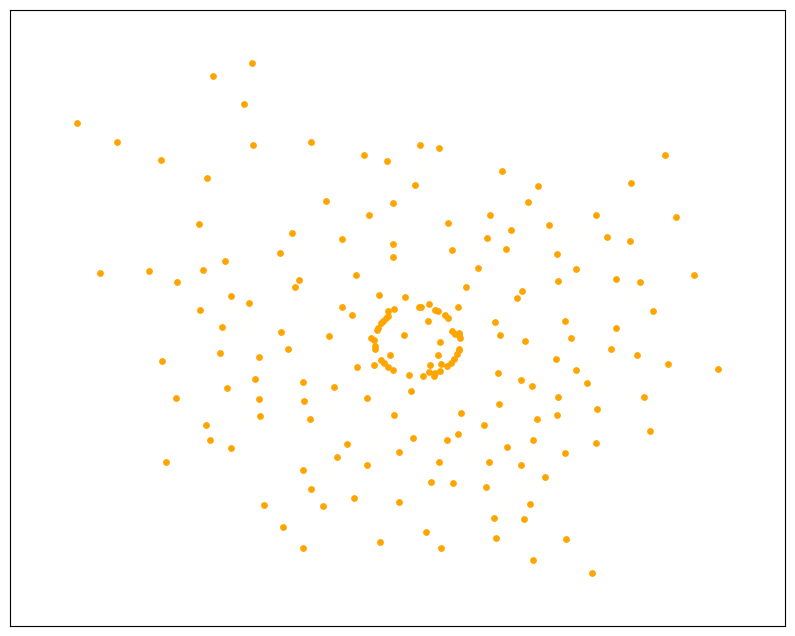

In [24]:
N = 200
p = 0.009
g = nx.gnp_random_graph(N, p)
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(g)
node_options = {"node_color": "orange", "node_size": 15}
node_edge = {"width": 0.3, "alpha": 0.05, "edge_color": "yellow"}
nx.draw_networkx_nodes(g, pos, **node_options)
nx.draw_networkx_edges(g, pos, **node_edge)
plt.show()

In [25]:
nx.degree(g)

DegreeView({0: 1, 1: 1, 2: 2, 3: 0, 4: 3, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 3, 11: 3, 12: 1, 13: 3, 14: 3, 15: 1, 16: 2, 17: 1, 18: 2, 19: 1, 20: 2, 21: 2, 22: 2, 23: 1, 24: 0, 25: 2, 26: 1, 27: 0, 28: 2, 29: 2, 30: 1, 31: 2, 32: 2, 33: 3, 34: 0, 35: 1, 36: 0, 37: 2, 38: 3, 39: 4, 40: 1, 41: 2, 42: 3, 43: 3, 44: 4, 45: 1, 46: 2, 47: 0, 48: 2, 49: 0, 50: 2, 51: 1, 52: 1, 53: 3, 54: 1, 55: 1, 56: 3, 57: 2, 58: 3, 59: 1, 60: 2, 61: 1, 62: 3, 63: 4, 64: 3, 65: 3, 66: 2, 67: 3, 68: 3, 69: 3, 70: 3, 71: 2, 72: 3, 73: 1, 74: 0, 75: 3, 76: 0, 77: 1, 78: 4, 79: 2, 80: 0, 81: 2, 82: 0, 83: 4, 84: 1, 85: 3, 86: 2, 87: 0, 88: 3, 89: 0, 90: 2, 91: 1, 92: 2, 93: 5, 94: 4, 95: 1, 96: 1, 97: 5, 98: 2, 99: 0, 100: 2, 101: 4, 102: 2, 103: 5, 104: 0, 105: 3, 106: 5, 107: 0, 108: 1, 109: 1, 110: 1, 111: 3, 112: 2, 113: 1, 114: 2, 115: 2, 116: 2, 117: 1, 118: 0, 119: 2, 120: 3, 121: 5, 122: 0, 123: 3, 124: 3, 125: 6, 126: 0, 127: 1, 128: 2, 129: 3, 130: 3, 131: 0, 132: 2, 133: 5, 134: 2, 135: 4, 136: 5, 13

In [26]:
nx.nodes(g)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [27]:
def component_size(graph):
    nodes = set(nx.nodes(graph))
    max,  max_id = 0,0
    while (len(nodes) > 0):
        node_id = nodes.pop()
        component = nx.node_connected_component(graph, node_id)

        if len(component) > max:
            max = len(component)
            max_id = node_id

        for node in component:
            nodes.discard(node)

    return max, max_id

In [28]:
lc_size, lc_id = component_size(g)

In [29]:
print('largest component size ', lc_size)
print(' largest component percentage',lc_id / N * 100)

largest component size  157
 largest component percentage 0.0


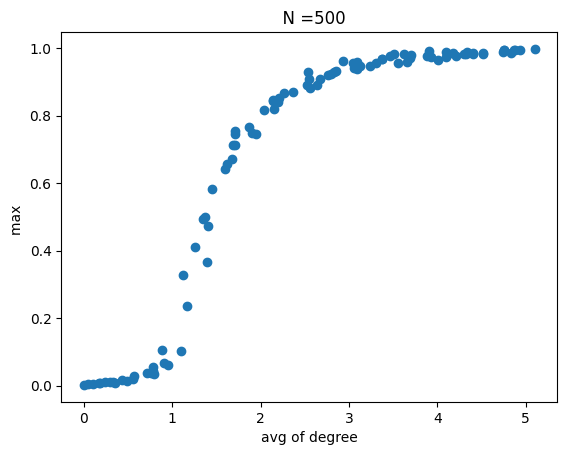

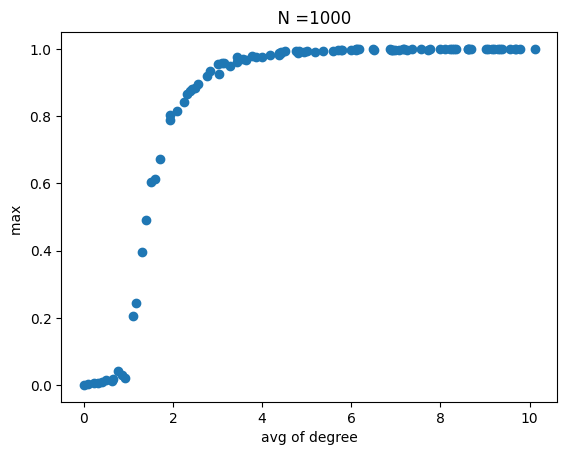

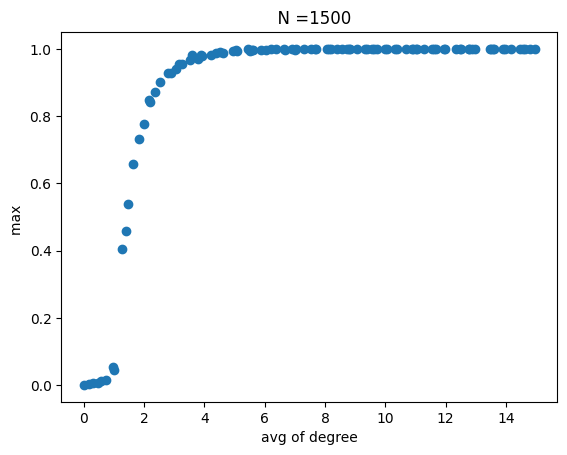

In [30]:
p_list = np.linspace(0, 0.01, 100, endpoint=True)
n_list = np.linspace(500, 1500, 3, endpoint=True)
for n in n_list:
    x_label = []
    y_label = []
    number_of_nodes = int(n)
    for p in p_list:
        graph = nx.gnp_random_graph(number_of_nodes, p)
        x_label.append(len(graph.edges) * 2 / number_of_nodes)
        max_size, _ = component_size_reporter(graph)
        y_label.append(max_size / number_of_nodes)

    plt.title(f'  N ={number_of_nodes}')
    plt.ylabel(f'max ')
    plt.xlabel(f'avg of degree')
    plt.scatter(x_label, y_label)
    plt.show()

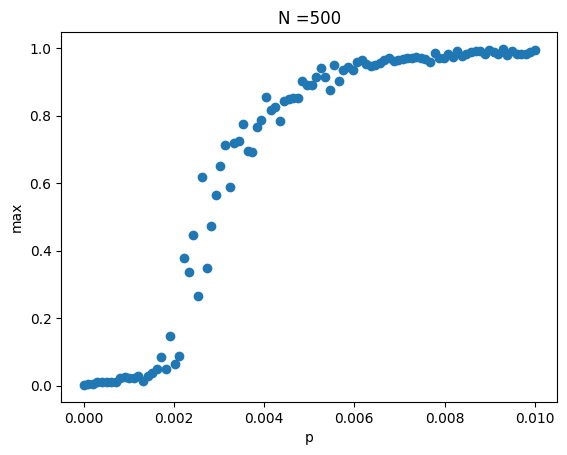

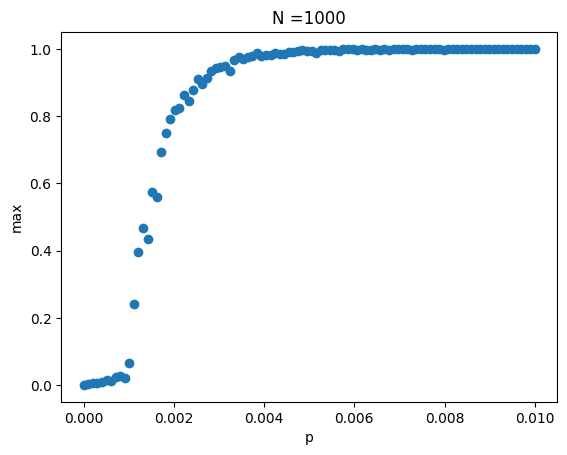

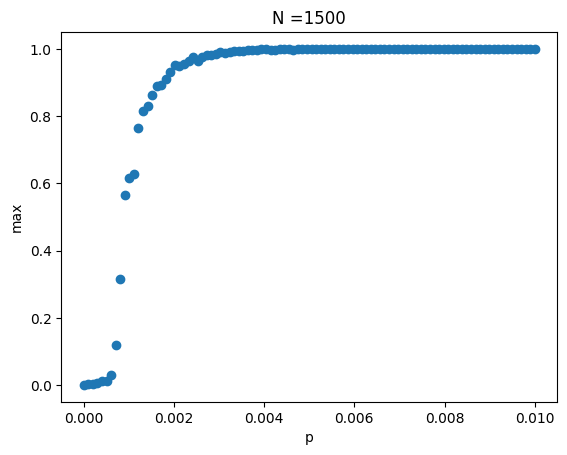

In [32]:
for n in n_list:
    x_label = []
    y_label = []
    number_of_nodes = int(n)
    for p in p_list:
        graph = nx.gnp_random_graph(number_of_nodes, p)
        x_label.append(p)
        max_size, _ = component_size_reporter(graph)
        y_label.append(max_size / number_of_nodes)

    plt.title(f'N ={number_of_nodes}')
    plt.ylabel(f'max')
    plt.xlabel(f'p')
    plt.scatter(x_label, y_label)
    plt.show()